In [6]:
# Daniel Hu
# Categorizing sentiment in text using amazon reviews

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import seaborn as sns


# Load dataframes for training and testing
test_df =  pd.read_csv("C:/SentimentAnalyzerApp/data/raw/emotion_data_3_test.csv", names = ['polarity','review_title','review_body']).dropna()

# Keep sentiment and text, drop the rest.
test_df.drop(['review_title'], axis = 1)

# Set axes
x_test = test_df.review_body
y_test = test_df.polarity

# Load model
model = joblib.load("C:/SentimentAnalyzerApp/models/model1.joblib")

# Get sentiment predictions
y_pred = model.predict(x_test)

# Replace numerical polarity values with 'positive' or 'negative'
y_test = y_test.replace({1:'negative', 2:'positive'})

# Compute numeric confusion matrix
num_cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])

# Compute normalized confusion matrix
normal_cm = confusion_matrix(y_test, y_pred, normalize="true", labels=['negative', 'positive'])

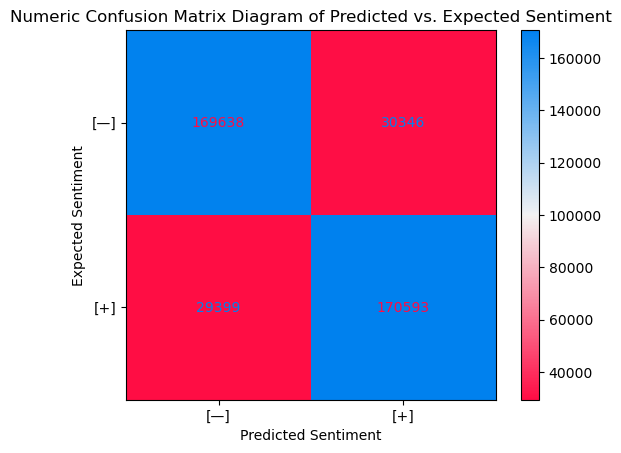

In [7]:
# Display confusion matrix with labels (numeric)
num_disp = ConfusionMatrixDisplay(confusion_matrix=num_cm, display_labels=['[—]', '[+]'])

num_disp.plot(cmap = sns.diverging_palette(8, 253, s = 100, l = 54, as_cmap=True), values_format = "d")

# Highlight false positives and false negatives
plt.title("Numeric Confusion Matrix Diagram of Predicted vs. Expected Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Expected Sentiment")

plt.show()

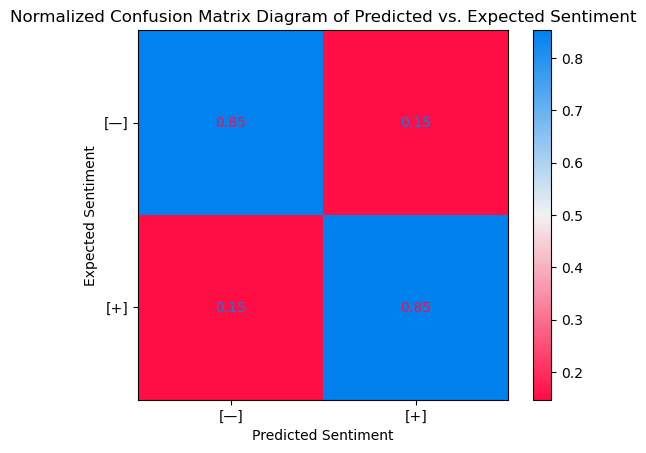

In [8]:
# Display confusion matrix with labels (normalized)
norm_disp = ConfusionMatrixDisplay(confusion_matrix=normal_cm, display_labels=['[—]', '[+]'])
norm_disp.plot(cmap = sns.diverging_palette(8, 253, s = 100, l = 54, as_cmap=True), values_format = ".2f")

# Highlight false positives and false negatives
plt.title("Normalized Confusion Matrix Diagram of Predicted vs. Expected Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Expected Sentiment")

plt.show()

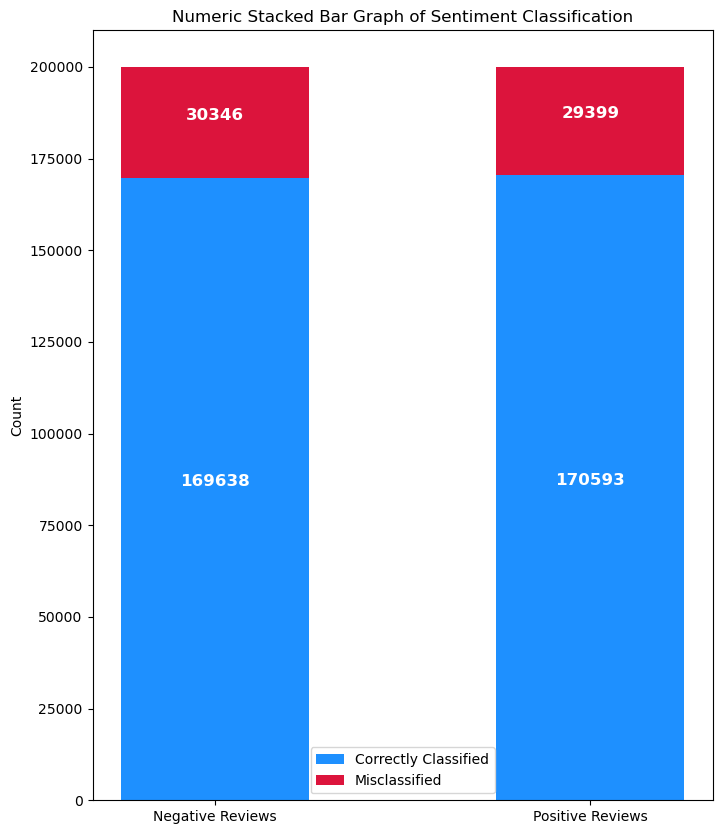

In [9]:
# Extract values
TN_num, FP_num, FN_num, TP_num = num_cm.ravel()  # Unpack values

# Create labels and values
categories = ['Negative Reviews', 'Positive Reviews']
true_values_num = [TN_num, TP_num]  # True classifications
false_values_num = [FP_num, FN_num]  # Misclassifications (FP, FN)

# Bar chart
fig, ax = plt.subplots(figsize=(8, 10))
bar_width = 0.5

bars1_num = np.array(true_values_num)  # True predictions
bars2_num = np.array(false_values_num)  # False predictions

# Plot stacked bars
p1 = plt.bar(categories, bars1_num, color=['dodgerblue'], label="Correctly Classified", width=bar_width)
p2 = plt.bar(categories, bars2_num, bottom=bars1_num, color=['crimson'], label="Misclassified", width=bar_width)

# Labels & legend
plt.ylabel("Count")
plt.title("Numeric Stacked Bar Graph of Sentiment Classification")
plt.legend()

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")

plt.show()


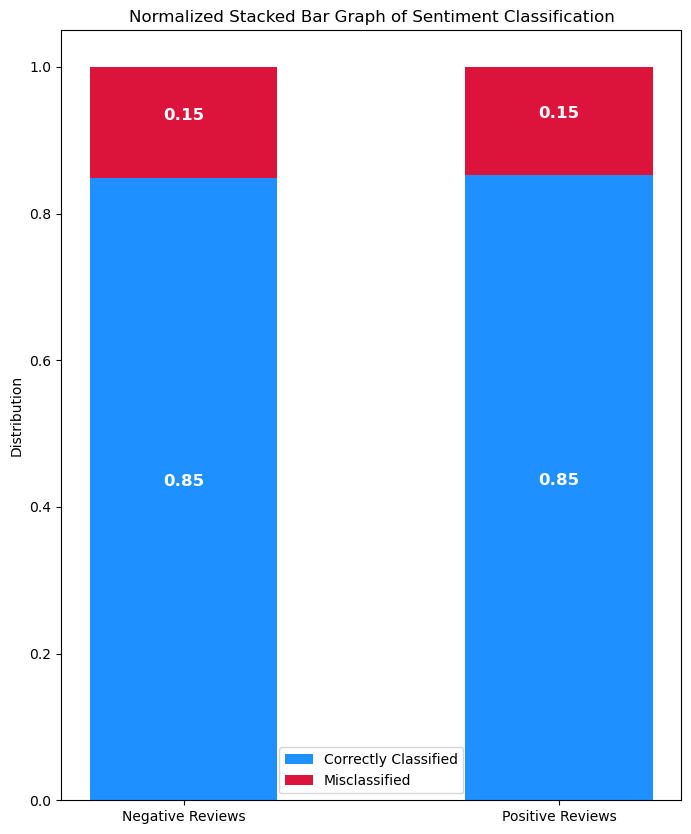

In [10]:
# Extract values
TN_norm, FP_norm, FN_norm, TP_norm = normal_cm.ravel()  # Unpack values

# Create labels and values
categories = ['Negative Reviews', 'Positive Reviews']
true_values_norm = [TN_norm, TP_norm]  # True classifications
false_values_norm = [FP_norm, FN_norm]  # Misclassifications (FP, FN)

# Bar chart
fig, ax = plt.subplots(figsize=(8, 10))
bar_width = 0.5

bars1_norm = np.array(true_values_norm)  # True predictions
bars2_norm = np.array(false_values_norm)  # False predictions

# Plot stacked bars
p1 = plt.bar(categories, bars1_norm, color=['dodgerblue'], label="Correctly Classified", width=bar_width)
p2 = plt.bar(categories, bars2_norm, bottom=bars1_norm, color=['crimson'], label="Misclassified", width=bar_width)

# Labels & legend
plt.ylabel("Distribution")
plt.title("Normalized Stacked Bar Graph of Sentiment Classification")
plt.legend()

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%.2f" % h1, ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%.2f" % h2, ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")

plt.show()